<a href="https://colab.research.google.com/github/M-ark17/MachineLearning/blob/master/Copy_of_ML_assignment1___ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification using Support Vector Machine
Please do not import any other python library except numpy and matplotlib 

In [0]:
import numpy as np          
import matplotlib.pyplot as plt

#Generating Random linearly separable data


In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)

#Visualizing the above data

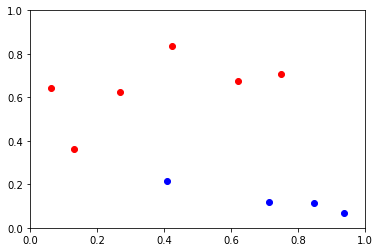

In [0]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)

#SVM Classifier
Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. 
You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.

In [0]:
def svm_function(x, y, epoch, l_rate):
    ###################################
    ### Write your code here###########
    # w = np.random.randn(x.shape[1])
    w = np.zeros(x.shape[1])
    for i in range(1,epoch):
      #permute = np.random.permutation(len(x))
      # j = permute[1]
      j= np.random.randint(0, len(x))
      l_rate_j = 1/(i*l_rate)
      z = np.dot(np.transpose(w),x[j,:])
      if (y[j]*z < 1):
        w = (1-l_rate_j*l_rate)*w + l_rate_j*np.multiply(y[j],x[j,:])
      else:
        w = (1-l_rate_j*l_rate)*w 
    ###################################
    return w

#Run SVM Classifier

In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
X = np.append(X,np.ones((X.shape[0],1)),axis=1)
w = svm_function(X, Y, 10000, .001)


#Visualize the classifier
Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated
(0.5*x - y + 0.25). 

-1.9070263980924886 4.896201926743763 -1.3001300130012985


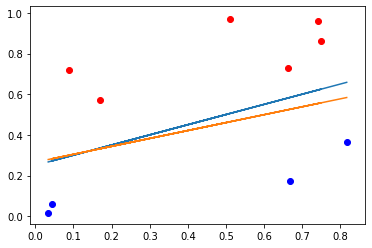

In [0]:
    ###################################
    ### Write your code here###########
    plt.plot(data[:,0],0.5*data[:,0] + 0.25)
    plot_data = np.zeros([len(data),2])
    for x, y, l in data:
      if l == 1: 
        clr = 'red'
      else: 
        clr = 'blue'
      plt.scatter(x, y, c=clr)
      # plt.xlim(0,1)
      # plt.ylim(0,1)
    print(w[0],w[1],w[2])
    plt.plot(data[:,0],(-w[0]/w[1])*data[:,0]-w[2]/w[1])
    ###################################

Increase the number of data-points and observe number of epochs to converge. Draw plots showing data-points, actual data seprating line and line corrosponding to 'w' you got from svm_function for 10, 20, 30, 40, 50 and 100 data-points. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

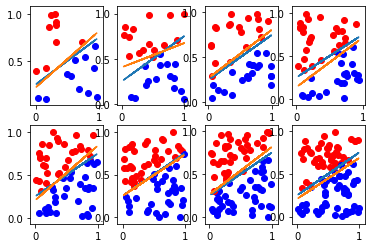

In [0]:
    ###################################
    ### Write your code here###########
    ###################################
    ll = 1
    fig = plt.figure()
    for l in np.arange(20,100,10):
      data_new = [[np.random.rand(), np.random.rand()] for i in range(l)]
      for i, point in enumerate(data_new):
        x, y = point
        if 0.5*x - y + 0.25 > 0:
          data_new[i].append(-1)
        else:
          data_new[i].append(1)
      data_new = np.asarray(data_new)
      X = data_new[:,:2]
      X = np.append(X,np.ones((X.shape[0],1)),axis=1)
      Y = data_new[:,2]
      w = svm_function(X, Y, 10000, 0.001)
      ax = fig.add_subplot(2,4,ll)
      ax.plot(data_new[:,0],0.5*data_new[:,0] + 0.25)
      plot_data_new = np.zeros([len(data_new),2])
      for x, y, l in data_new:
        if l == 1: 
          clr = 'red'
        else: 
          clr = 'blue'
        ax.scatter(x, y, c=clr)
      ax.plot(data_new[:,0],-(w[0]/w[1])*data_new[:,0]-w[2]/w[1])
      ll += 1 
      

#Perturbing the previously created  data
Add noise to the data and visualize the resulting classifier.




In [0]:
for i in range(len(data)):
  data[i][0] += (np.random.rand() - 0.5) / 2.
  data[i][1] += (np.random.rand() - 0.5) / 2.

#Visualizing the perturbed Data

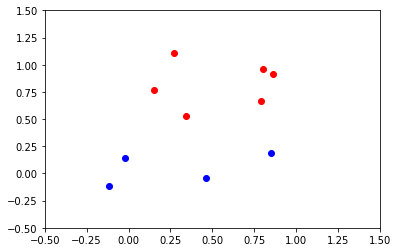

In [0]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(-0.5,1.5)
  plt.ylim(-0.5,1.5)

#Visualize the classifier trained on noisy data
Plot actual seperating line and seperating line you got from svm_classifier. Do this for 10, 20, 30, 40, 50 and 100 data points. You can vary the scale of noise as well. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

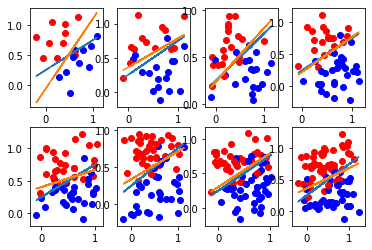

In [0]:
    ###################################
    ### Write your code here###########
    ###################################
    ll = 1
    fig = plt.figure()
    for l in np.arange(20,100,10):
      data_noisy = [[np.random.rand(), np.random.rand()] for i in range(l)]
      for i, point in enumerate(data_noisy):
        x, y = point
        if 0.5*x - y + 0.25 > 0:
          data_noisy[i].append(-1)
        else:
          data_noisy[i].append(1)
      for i in range(len(data_noisy)):
        data_noisy[i][0] += (np.random.rand() - 0.5) / 2.
        data_noisy[i][1] += (np.random.rand() - 0.5) / 2.
      data_noisy = np.asarray(data_noisy)
      X = data_noisy[:,:2]
      X = np.append(X,np.ones((X.shape[0],1)),axis=1)
      Y = data_noisy[:,2]
      w = svm_function(X, Y, 10000, 0.001)
      ax = fig.add_subplot(2,4,ll)
      ax.plot(data_noisy[:,0],0.5*data_noisy[:,0] + 0.25)
      plot_data_noisy = np.zeros([len(data_noisy),2])
      for x, y, l in data_noisy:
        if l == 1: 
          clr = 'red'
        else: 
          clr = 'blue'
        ax.scatter(x, y, c=clr)
      ax.plot(data_noisy[:,0],-(w[0]/w[1])*data_noisy[:,0]-w[2]/w[1])
      ll += 1 

#Read the Random Non-linear data stored in CSV1 and visualize it

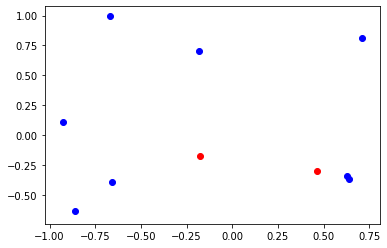

In [10]:
    ################################################
    ### Write your code here (read data) ###########
    ################################################
    my_data = np.genfromtxt('csv1.csv', delimiter=',')

    ###################################################
    ### Write your code here (visualization)###########
    ###################################################

    for x, y, l in my_data:
      if l == 1: 
        clr = 'red'
      else: 
        clr = 'blue'
      plt.scatter(x, y, c=clr)


#Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data
For linearly non-separable data, you need to transform the data in a space where it can be linearly seprable. These features can be exponential, polynomial, trignometric or any other function of actual input features. For example, if your input data is (x1, x2) you can have hand-crafted features as (sin(x1), cos(x1), cos(x2), x1-x2). 
Here you need to think of which hand-crafted features can be best suited for data given to you. Write a function to convert input features to hand-crafted features. Use these features to train a SVM using svm_function.
Note that, if you choose to have L hand-crafted features, SVM will return L+1 dimensional 'w'. 


In [0]:
    ################################################
    ### Write your code here for features###########
    ################################################
      X = my_data[:,:2]
      X = np.append(X,np.ones((X.shape[0],1)),axis=1)
      X = np.abs(X)
      Y = my_data[:,2]

    ######################################################
    ### Write your code here for classification###########
    ######################################################
      w = svm_function(X, Y, 10000, 0.001)


#Visualize decision boundary
Here, as 'w' retuened by svm_function is (L+1) dimensional, you can not visualize it in the form of line in 2D. To visualize non-linear decision boundary in 2D, you can generate few hundred random data-points and can observe if classifier labels them +1 or -1. Then you can plot this points with different colors to get emperical decision boundary. Write the code for visualization of non-linear decision boundary in next cell.

(-1, 1)

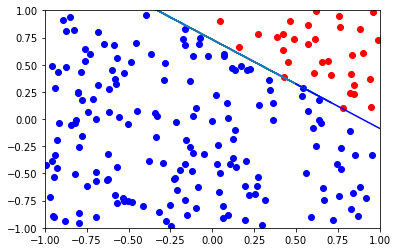

In [44]:
    ###################################
    ### Write your code here###########
    ###################################
    for i in range(0,200):
      smpl_ipx = 1-2*np.random.rand()
      smpl_ipy = 1-2*np.random.rand()
      if((w[0]/w[1])*smpl_ipx+w[2]/w[1]+smpl_ipy)>0:
        clr = 'red'
      else:
        clr = 'blue'
      plt.scatter(smpl_ipx, smpl_ipy, c=clr)
    plt.plot(my_data[:,0],-(w[0]/w[1])*my_data[:,0]-w[2]/w[1])
    plt.plot([0.5,1],[-(w[0]/w[1])*0.5-w[2]/w[1],-(w[0]/w[1])-w[2]/w[1]],c='blue')
    plt.xlim(-1,1)
    plt.ylim(-1,1)

#Read the Random Non-linear data stored in CSV2

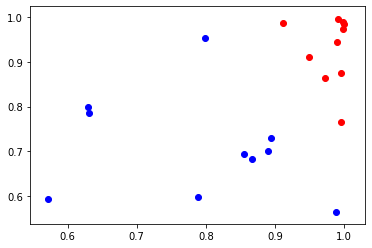

In [34]:
    ###################################
    ### Write your code here###########
    ###################################
    my_data2 = np.genfromtxt('csv2.csv', delimiter=',')

    for x, y, l in my_data2:
      if l == 1: 
        clr = 'red'
      else: 
        clr = 'blue'
      plt.scatter(np.cos(x), np.cos(y), c=clr)

#Train a SVM classifier on the non linear data by appropriate features and also visualise it

(-1, 3)

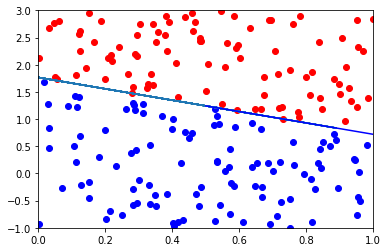

In [78]:
    ###################################
    ### Write your code here###########
    ###################################
      X = np.cos(my_data2[:,:2])
      X = np.append(X,np.ones((X.shape[0],1)),axis=1)
      Y = my_data2[:,2]
      w = svm_function(X, Y, 10000, 0.001)
      for i in range(0,200):
        smpl_ipx = np.random.rand()
        smpl_ipy = 2*(1-2*np.random.rand())+1
        if((w[0]/w[1])*smpl_ipx+w[2]/w[1]+smpl_ipy)>0:
          clr = 'red'
        else:
          clr = 'blue'
        plt.scatter(smpl_ipx, smpl_ipy, c=clr)
      plt.plot(my_data2[:,0],-(w[0]/w[1])*my_data2[:,0]-w[2]/w[1])
      plt.plot([0.5,1],[-(w[0]/w[1])*0.5-w[2]/w[1],-(w[0]/w[1])-w[2]/w[1]],c='blue')
      plt.xlim(0,1)
      plt.ylim(-1,3)

#Read the Random Non-linear data stored in CSV3

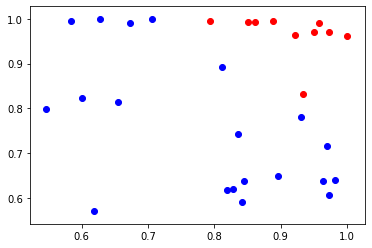

In [81]:
    ###################################
    ### Write your code here###########
    ###################################
    my_data3 = np.genfromtxt('csv3.csv', delimiter=',')

    for x, y, l in my_data3:
      if l == 1: 
        clr = 'red'
      else: 
        clr = 'blue'
      plt.scatter(np.cos(x), np.cos(y), c=clr)

#Train a SVM classifier on the non linear data by appropriate Feature Engineering and also visualise it

(-1, 3)

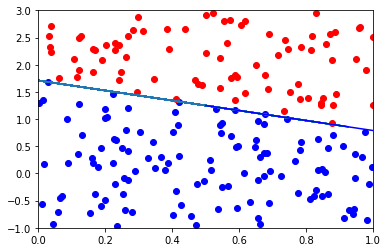

In [73]:
    ###################################
    ### Write your code here###########
    ###################################
      X = np.cos(my_data3[:,:2])
      X = np.append(X,np.ones((X.shape[0],1)),axis=1)
      Y = my_data3[:,2]
      w = svm_function(X, Y, 10000, 0.001)
      for i in range(0,200):
        smpl_ipx = np.random.rand()
        smpl_ipy = 2*(1-2*np.random.rand())+1
        if((w[0]/w[1])*smpl_ipx+w[2]/w[1]+smpl_ipy)>0:
          clr = 'red'
        else:
          clr = 'blue'
        plt.scatter(smpl_ipx, smpl_ipy, c=clr)
      plt.plot(my_data3[:,0],-(w[0]/w[1])*my_data3[:,0]-w[2]/w[1])
      plt.plot([0.5,1],[-(w[0]/w[1])*0.5-w[2]/w[1],-(w[0]/w[1])-w[2]/w[1]],c='blue')
      plt.xlim(0,1)
      plt.ylim(-1,3)